<a href="https://colab.research.google.com/github/Saheb1012/ulnn/blob/main/cropdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from zipfile import ZipFile

data_path = '/content/WHEAT_DATA.zip'

with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')




The data set has been extracted.


In [ ]:
# Set image size and paths
IMG_SIZE = 256
BATCH_SIZE = 32
DATASET_PATH = '/content/TRAIN'  # Replace with the correct path

# Simple image loader without augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% validation split
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop]
)



Found 1222 images belonging to 10 classes.
Found 301 images belonging to 10 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,266 (56.61 MB)

 Trainable params: 14,840,266 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.1536 - loss: 2.8070 - val_accuracy: 0.2159 - val_loss: 2.4670
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 957ms/step - accuracy: 0.2431 - loss: 2.0919 - val_accuracy: 0.2591 - val_loss: 1.9148
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 38s 968ms/step - accuracy: 0.4151 - loss: 1.6934 - val_accuracy: 0.3920 - val_loss: 1.8076
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4941 - loss: 1.5246 - val_accuracy: 0.4950 - val_loss: 1.6688
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 941ms/step - accuracy: 0.5385 - loss: 1.3631 - val_accuracy: 0.4684 - val_loss: 1.6422
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 927ms/step - accuracy: 0.6134 - loss: 1.1620 - val_accuracy: 0.5482 - val_loss: 1.4247
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6708 - loss: 1.0456 - val_accuracy: 0.5316 - val_loss: 1.5483
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 38s 972ms/step - accuracy: 0.7149 - loss: 0.8156 - val_accuracy: 0.5

In [ ]:
# Save the model
model.save("Cropdiseasedetection_model.h5")

In [ ]:
from google.colab import files
files.download('Cropdiseasedetection_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import cv2
import tensorflow as tf

# Load model
model = tf.keras.models.load_model("NewCropdiseasedetection_model.h5")

# Define correct class order based on your training
classes = ['Healthy wheat', 'Wheat Brown leaf Rust', 'Wheat Stem fly', 'Wheat aphid', 'Wheat black rust','Wheat leaf blight','Wheat mite','Wheat powdery mildew','Wheat scab','Wheat_Yellow_Rust']

# Test image path
image_path = "/content/2KS7HG.jpg"  # CHANGE THIS for each test

# Preprocess the image
IMG_SIZE = 256
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img = img / 255.0  # Only if you used rescale=1./255 during training
img = np.expand_dims(img, axis=0)

# Predict
predictions = model.predict(img)
print("Raw prediction scores:", predictions)
print("Predicted class:", classes[np.argmax(predictions)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Raw prediction scores: [[6.9419599e-01 3.0994764e-07 2.8689788e-04 1.7132779e-03 6.8708294e-04
  5.9820376e-03 2.4211109e-03 2.9021004e-01 4.3369294e-03 1.6635860e-04]]
Predicted class: Healthy wheat


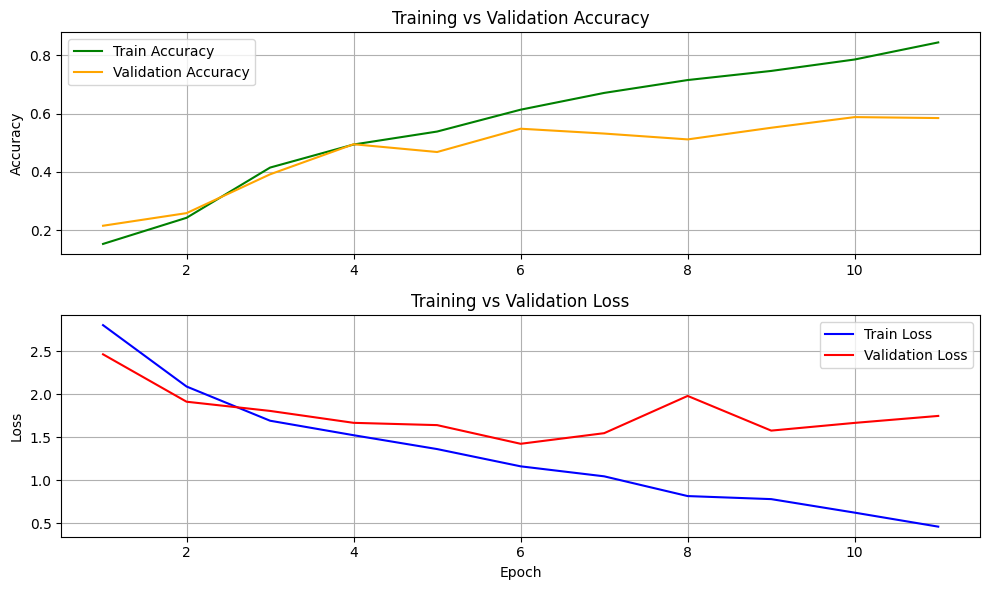

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 12))
train_accuracy = [0.1536, 0.2431, 0.4151, 0.4941, 0.5385, 0.6134, 0.6708, 0.7149, 0.7461, 0.7853, 0.8438]
val_accuracy = [0.2159, 0.2591, 0.3920, 0.4950, 0.4684, 0.5482, 0.5316, 0.5116, 0.5515, 0.5880, 0.5847]

train_loss = [2.8070, 2.0919, 1.6934, 1.5246, 1.3631, 1.1620, 1.0456, 0.8156, 0.7801, 0.6225, 0.4594]
val_loss = [2.4670, 1.9148, 1.8076, 1.6688, 1.6422, 1.4247, 1.5483, 1.9823, 1.5782, 1.6682, 1.7493]

plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(2, 1, 1)
plt.plot(epochs, train_accuracy, label='Train Accuracy', color='green')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(2, 1, 2)
plt.plot(epochs, train_loss, label='Train Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
